<a href="https://colab.research.google.com/github/joaovictoramaralgoncalves/Projetos_de_aprendizado/blob/master/Module_3_Specialized_Visualization_Tools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 3 - Specialized Visualization Tools

*para criar uma núvem de palavras precisamos de um texto

##OBSERVAÇÕES GERAIS
Para abrir R no Google Colab basta usar o código: https://colab.research.google.com/#create=true&language=r

## Parâmetros

In [4]:
## Bibliotecas ##
'
tm <- significa mineração de texto, irá transformar o 
texto em um formato que é manipulado por R.'
install.packages("tm")
'
wordcloud <- criará a visualização'
install.packages("wordcloud")

library(tm)
library(wordcloud)

[1] "\ntm <- significa mineração de texto, irá transformar o \ntexto em um formato que é manipulado por R."

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘NLP’, ‘Rcpp’, ‘slam’, ‘BH’




[1] "\nwordcloud <- criará a visualização"

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: NLP

Loading required package: RColorBrewer



In [2]:
#getwd()    # Verificando em que diretório estou
dir.create("wordcloud")    # criando novo diretório

In [3]:
## fazendo download do texto de inspiração
download.file("https://ibm.box.com/shared/static/cmid70rpa7xe4ocitcga1bve7r0kqnia.txt",
              destfile = "wordcloud/churchill_speeches.txt",quiet = TRUE)

## Pegando os documentos e inspecionando

In [5]:
## selecionando o diretório que nosso texto está localizado
dirPath <- file.path(getwd(), "wordcloud")
### contando os documentos que tem no diretório
list.files(dirPath)

## carregando os dados
speech <- Corpus(DirSource(dirPath))

###verificando o copo do testo
inspect(speech)

[1] "churchill_speeches.txt"

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 1

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

## Limpando os dados

In [12]:
speech <- tm_map(speech, content_transformer(tolower))  # palavara em minúsculas
speech <- tm_map(speech, removeNumbers) # removendo números
speech <- tm_map(speech, removeWords,
                 stopwords("english"))  # removendo paravres sparadas (we, the)
'
da para excluir palavras que desejar também, como no exemplo a baixo'
speech <- tm_map(speech, removeWords,
                  c("floccinaucinihilipification","squirrelled","the"))
speech <- tm_map(speech, removePunctuation)  # removendo pontuação
speech <- tm_map(speech, stripWhitespace)  # remove espaços em branco

[1] "\nda para excluir palavras que desejar também, como no exemplo a baixo"

## Criando Matriz com a frequência das palavras no texto

In [13]:
# Criando uma Matriz com a frequência das palavras
dtm <- TermDocumentMatrix(speech)

# Matrix transformation em uma matriz
m <- as.matrix(dtm)

# classificando as palavras pela frequência
v <- sort(rowSums(m),decreasing=TRUE)

d <- data.frame(word = names(v), freq=v)
head(d,10)

,word,freq
,<chr>,<dbl>
shall,shall,11
fight,fight,7
may,may,6
will,will,6
europe,europe,5
upon,upon,5
victory,victory,5
war,war,5
can,can,4


# Núvem de Palavras

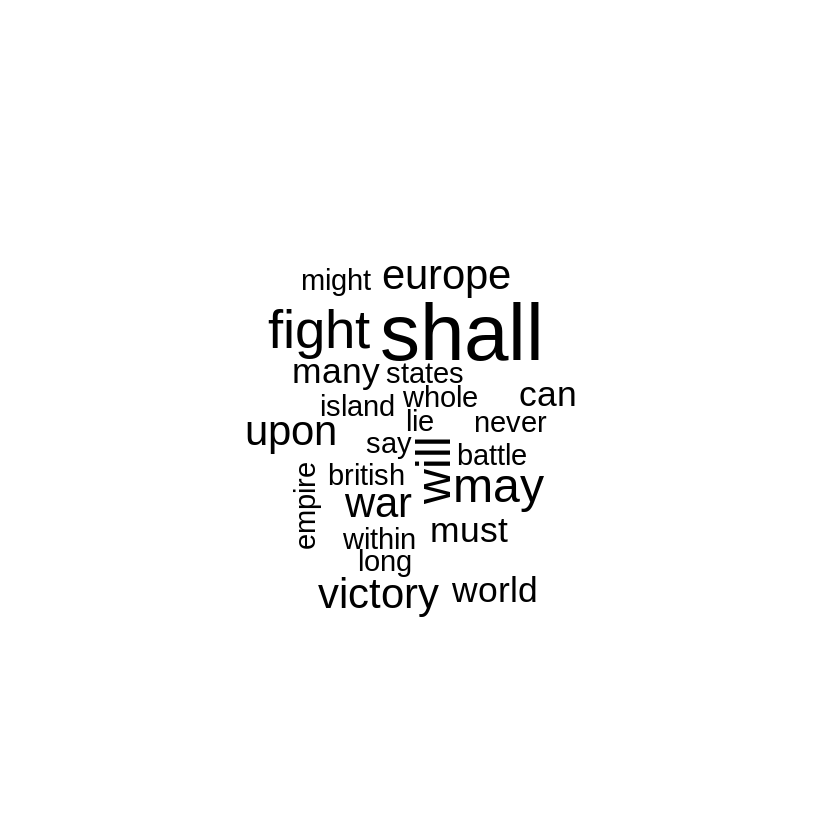

In [14]:
# Núvem de palavras menor
wordcloud(words = d$word, freq = d$freq)

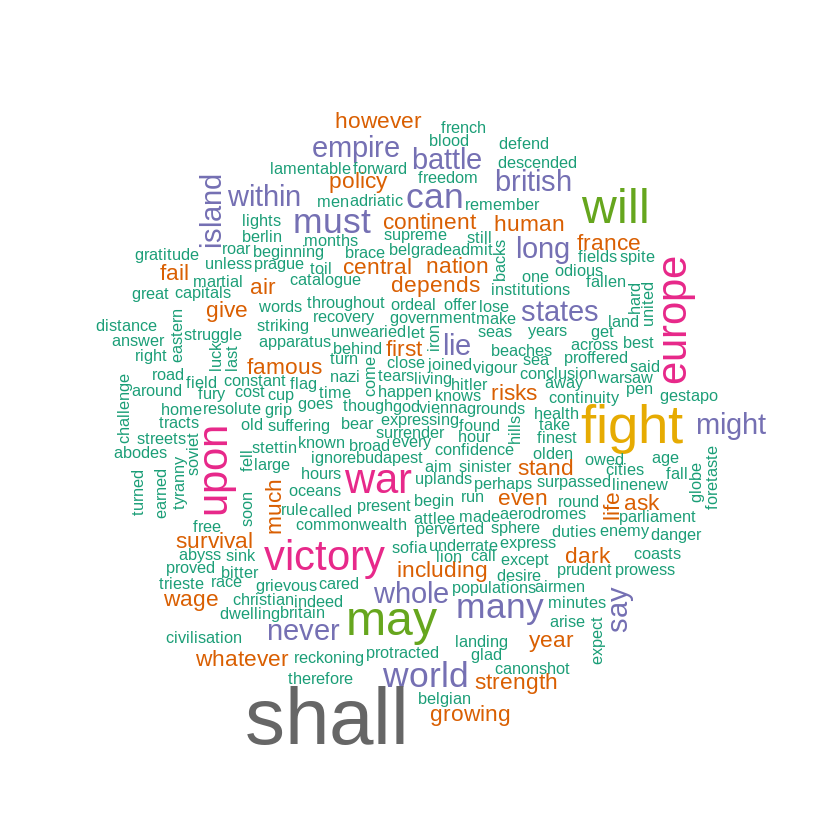

In [15]:
# Núvem de palavras maior colorida
wordcloud(words = d$word, freq = d$freq,
          min.freq=1, max.words=250,
          colors=brewer.pal(8,"Dark2"))

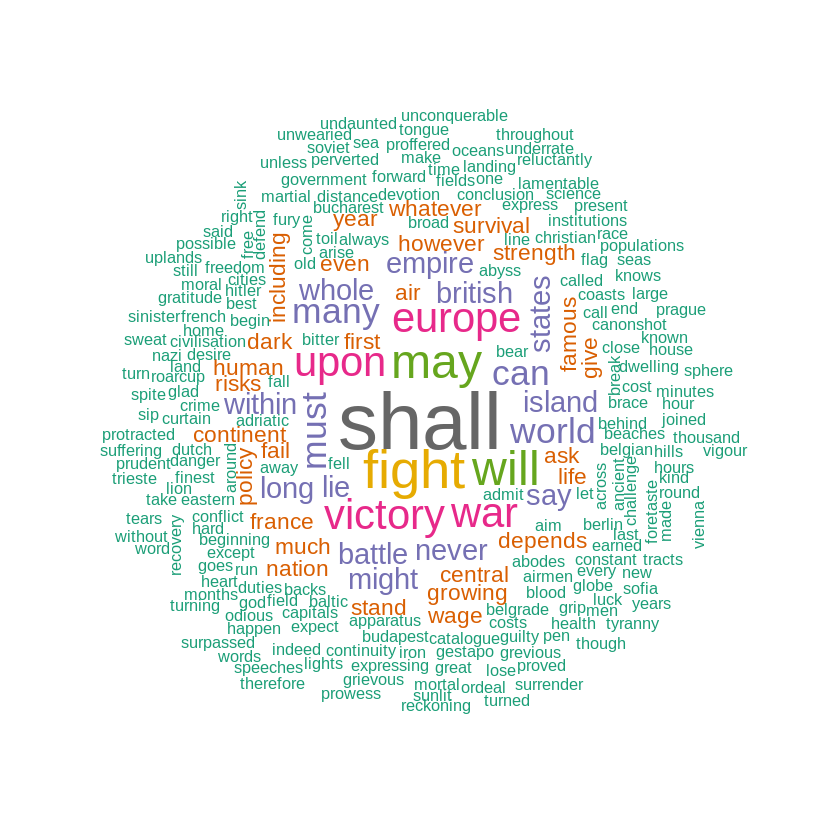

In [16]:
# núvem de palavras com a concentração no centro
wordcloud(words = d$word, freq = d$freq,
          min.freq=1, max.words=250,
          colors=brewer.pal(8,"Dark2"),
          random.order = FALSE)

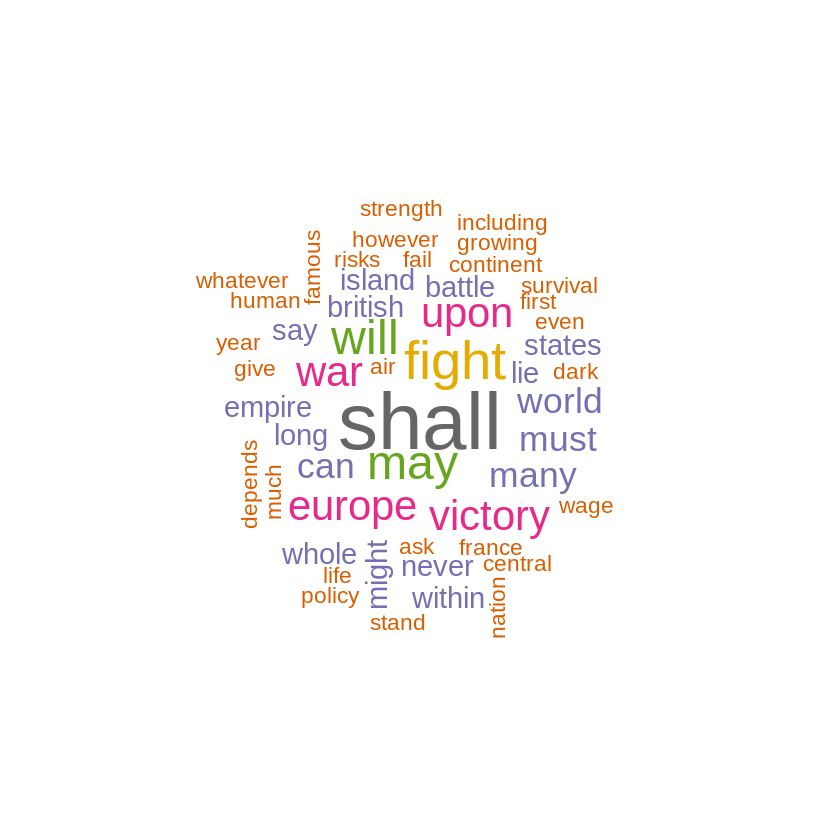

In [18]:
# núvem de palavras menor com a concentração no centro
wordcloud(words = d$word, freq = d$freq,
          min.freq=2, colors=brewer.pal(8,"Dark2"),
          random.order = FALSE)